<a href="https://colab.research.google.com/github/arthursou/Loggi-IC/blob/master/Shape_Alagamentos_Resolucao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install osmnx

In [ ]:
# acontecendo erro na versão 3.3.3
!pip install matplotlib==3.1.3 

In [ ]:
#Importando as bibliotecas
import matplotlib.pyplot as plt
import osmnx as ox
import networkx as nx
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point,LineString, MultiLineString
from osgeo import ogr
import numpy as np

In [ ]:
# Pela coordenada do pluviometro
pluvio = gpd.read_file('/content/drive/MyDrive/IC_Arthur_UNIFESP/Dados/Dados_Oficiais/pluvio833A.shp')
coords =(float(pluvio['latitude']),float(pluvio['longitude']))

In [ ]:
#carregando dados Shapefile de alagamentos
alagamentos = gpd.read_file('/content/drive/MyDrive/IC_Arthur_UNIFESP/Dados/Dados_Oficiais/Final-Alag2km.shp')

In [ ]:
alagamentos

In [ ]:
#obtendo coordenadas do pluviometro 833A e gerando grafo a partir desse raio
graph = ox.graph_from_point(coords,dist=2000, network_type='bike')
ox.plot_graph(graph,figsize=(40, 30))

In [ ]:
graph = ox.project_graph(graph, to_crs= 4326) #convertendo para o crs correto

In [ ]:
#carregando os nós e arestas do grafo gerado
nodes, edges = ox.graph_to_gdfs(graph)

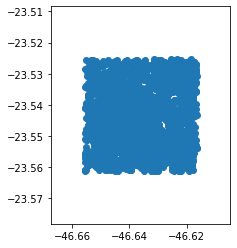

In [ ]:
#plotando nos
nodes.plot()

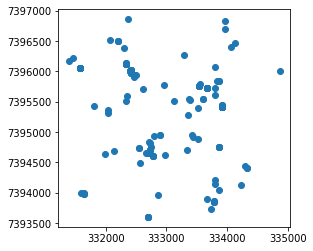

In [ ]:
#plotando dados de alagamentos shapefile
alagamentos.plot()

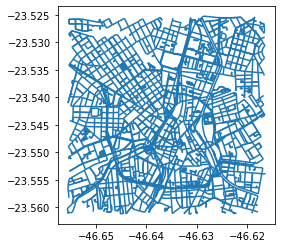

In [ ]:
#plotando arestas do grafo
edges.plot()

In [ ]:
#rua/ponto inicio de trajeto
rua1 = "Rua Madeira, São Paulo, Brasil"
x,y = ox.geocode(rua1)
orig_node = ox.nearest_nodes(G=graph,X=y,Y=x)
print(orig_node,x,y)

452092021 -23.4490793 -46.3025782


In [ ]:
#rua de chegada do trajeto
rua2 = "Rua 25 d Março 238, São Paulo, Brasil"
x1,y1 = ox.geocode(rua2)
target_node = ox.nearest_nodes(G=graph,X=y1,Y=x1)
print(target_node,x1,y1)

4249855173 -23.5474871 -46.6310113


In [ ]:
#convertendo para mesmo crs 
alagamentos = alagamentos.to_crs(4326)

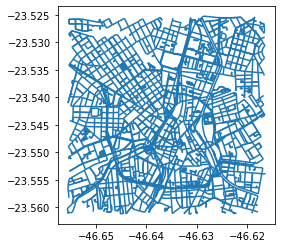

<Figure size 720x720 with 0 Axes>

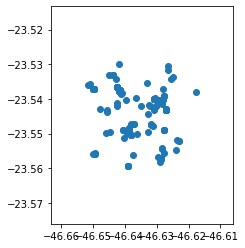

In [ ]:
#plotando arestas e pontos de alagamentos


edges.plot()
plt.figure(figsize=(10,10))
alagamentos.plot()

plt.show()

In [ ]:
#selecionando todos as coordenadas dos pontos de alagamento do shape

y_all_lat = []
x_all_long = []


for i in alagamentos['geometry']:
    
    multipoint = ogr.CreateGeometryFromWkt(str(i))
    point = multipoint.GetGeometryRef(0)
    y_all_lat.append(point.GetY())
    x_all_long.append(point.GetX())

print(y_all_lat)
print(x_all_long)
    

[-23.54940800069172, -23.54891000069172, -23.55033000069174, -23.54211000069156, -23.54035600069152, -23.53926000069149, -23.54312300069157, -23.53974000069151, -23.55033000069174, -23.53649600069142, -23.55577100069186, -23.54940800069172, -23.53649600069142, -23.55574300069186, -23.55134900069176, -23.54312300069157, -23.53704000069145, -23.53660000069143, -23.55033000069174, -23.54909100069172, -23.54981000069173, -23.55824000069192, -23.53823900069148, -23.5571950006919, -23.54908900069172, -23.53303000069137, -23.54908900069172, -23.53704000069145, -23.54035600069152, -23.53795000069147, -23.53660000069143, -23.53978100069151, -23.53753500069146, -23.55452000069184, -23.54312300069157, -23.54981000069173, -23.54909100069172, -23.5571950006919, -23.54035600069152, -23.55567000069186, -23.54979000069173, -23.54827000069169, -23.53357500069138, -23.5571950006919, -23.53416100069139, -23.54035600069152, -23.5392510006915, -23.54135200069154, -23.54908900069172, -23.53660000069143, -23

In [ ]:
#encontrando todos os pontos de alagamento do shape no osmnx
all_nodes = []

for i in range(len(alagamentos)):
    all_nodes.append(ox.nearest_nodes(G=graph,X=x_all_long[i],Y=y_all_lat[i]))
    
print(len(all_nodes),all_nodes)

165 [25928964, 285488804, 4034133824, 4530629173, 1938339357, 2580258671, 8659531010, 1938339389, 4034133824, 64095069, 2140878170, 25928964, 64095069, 2441819626, 395763941, 8659531010, 2283841571, 64095074, 4034133824, 60685410, 4251744610, 246650791, 64095077, 445044382, 151243285, 64075373, 151243285, 2283841571, 1938339357, 64095075, 64095074, 2390933495, 64095075, 247951118, 8659531010, 4251744610, 60685410, 445044382, 1938339357, 2140878165, 4251744610, 25928961, 6213473290, 445044382, 171970567, 1938339357, 2580258671, 8073587469, 151243285, 64095074, 2283841571, 60686006, 64095074, 8659531010, 1477493799, 2283841571, 60641204, 64095074, 60685428, 4034133824, 64095075, 248110883, 8977158023, 1938339357, 248110872, 445044382, 64095077, 8659531010, 1938339357, 148492009, 64095075, 8953143574, 4251744610, 175993483, 452091580, 2283841571, 396034445, 2283841571, 25928964, 2283841571, 4011418236, 64095075, 64095074, 60641204, 64095075, 64095077, 60685726, 7292638266, 248110872, 2481

In [ ]:
# Calculando o menor caminho e removendo os pontos de alagamentos
route = ox.shortest_path(graph, orig = orig_node, dest = target_node, weight='length')

G2 = graph.copy()

G2.remove_nodes_from(all_nodes)

rota_sem_alagamento = ox.shortest_path(G2, orig = orig_node, dest = target_node, weight='length')

print(route)
print(rota_sem_alagamento)

[452092021, 2931798713, 929634095, 452091701, 929634118, 3476782010, 3474049739, 3476782011, 3474049722, 9099314855, 9099314852, 9099314850, 452091626, 452091619, 1955031871, 452091618, 452091617, 2581691978, 3577328405, 2581690720, 3824584730, 25872763, 25872749, 246650435, 60734257, 1068077341, 461879147, 171976300, 461879227, 2395227702, 171976302, 171976304, 3406376394, 5128445335, 1938339357, 133485708, 4509509557, 5122017702, 599043086, 175993584, 2389060458, 2389060592, 7285140917, 2389060470, 1420146734, 60685982, 4803680668, 60685971, 4249855098, 4249855173]
[452092021, 2931798713, 929634095, 452091701, 5372645306, 6110752118, 461879324, 7986934526, 461875226, 461879350, 461879372, 3476781999, 461875205, 461875207, 5007915895, 8743131816, 8743228517, 2814556782, 7285629042, 171968212, 461894949, 461894945, 461894915, 437564551, 929701842, 434003387, 434003385, 8815902832, 2449978337, 434003382, 2389060633, 2449978343, 2449978345, 7990934267, 3701154929, 890510535, 8003099021, 

In [ ]:
#calcula o tamanho da rotas em metros e numero de arestas
compri = ox.utils_graph.get_route_edge_attributes(graph,route)
comprimento_sem_alagamento = ox.utils_graph.get_route_edge_attributes(graph,rota_sem_alagamento)
a = 0
b = 0

for i in range(len(compri)):
        a += compri[i]['length']
print(f'Rota Vermelha: {a:.3f} metros')
print("Arestas:",len(route)-1)

for i in range(len(comprimento_sem_alagamento)):
        b += comprimento_sem_alagamento[i]['length']
print(f'Rota Amarela: {b:.3f} metros')
print('Arestas:',len(rota_sem_alagamento)-1)

Rota Vermelha: 3275.314 metros
Arestas: 49
Rota Amarela: 4423.223 metros
Arestas: 52


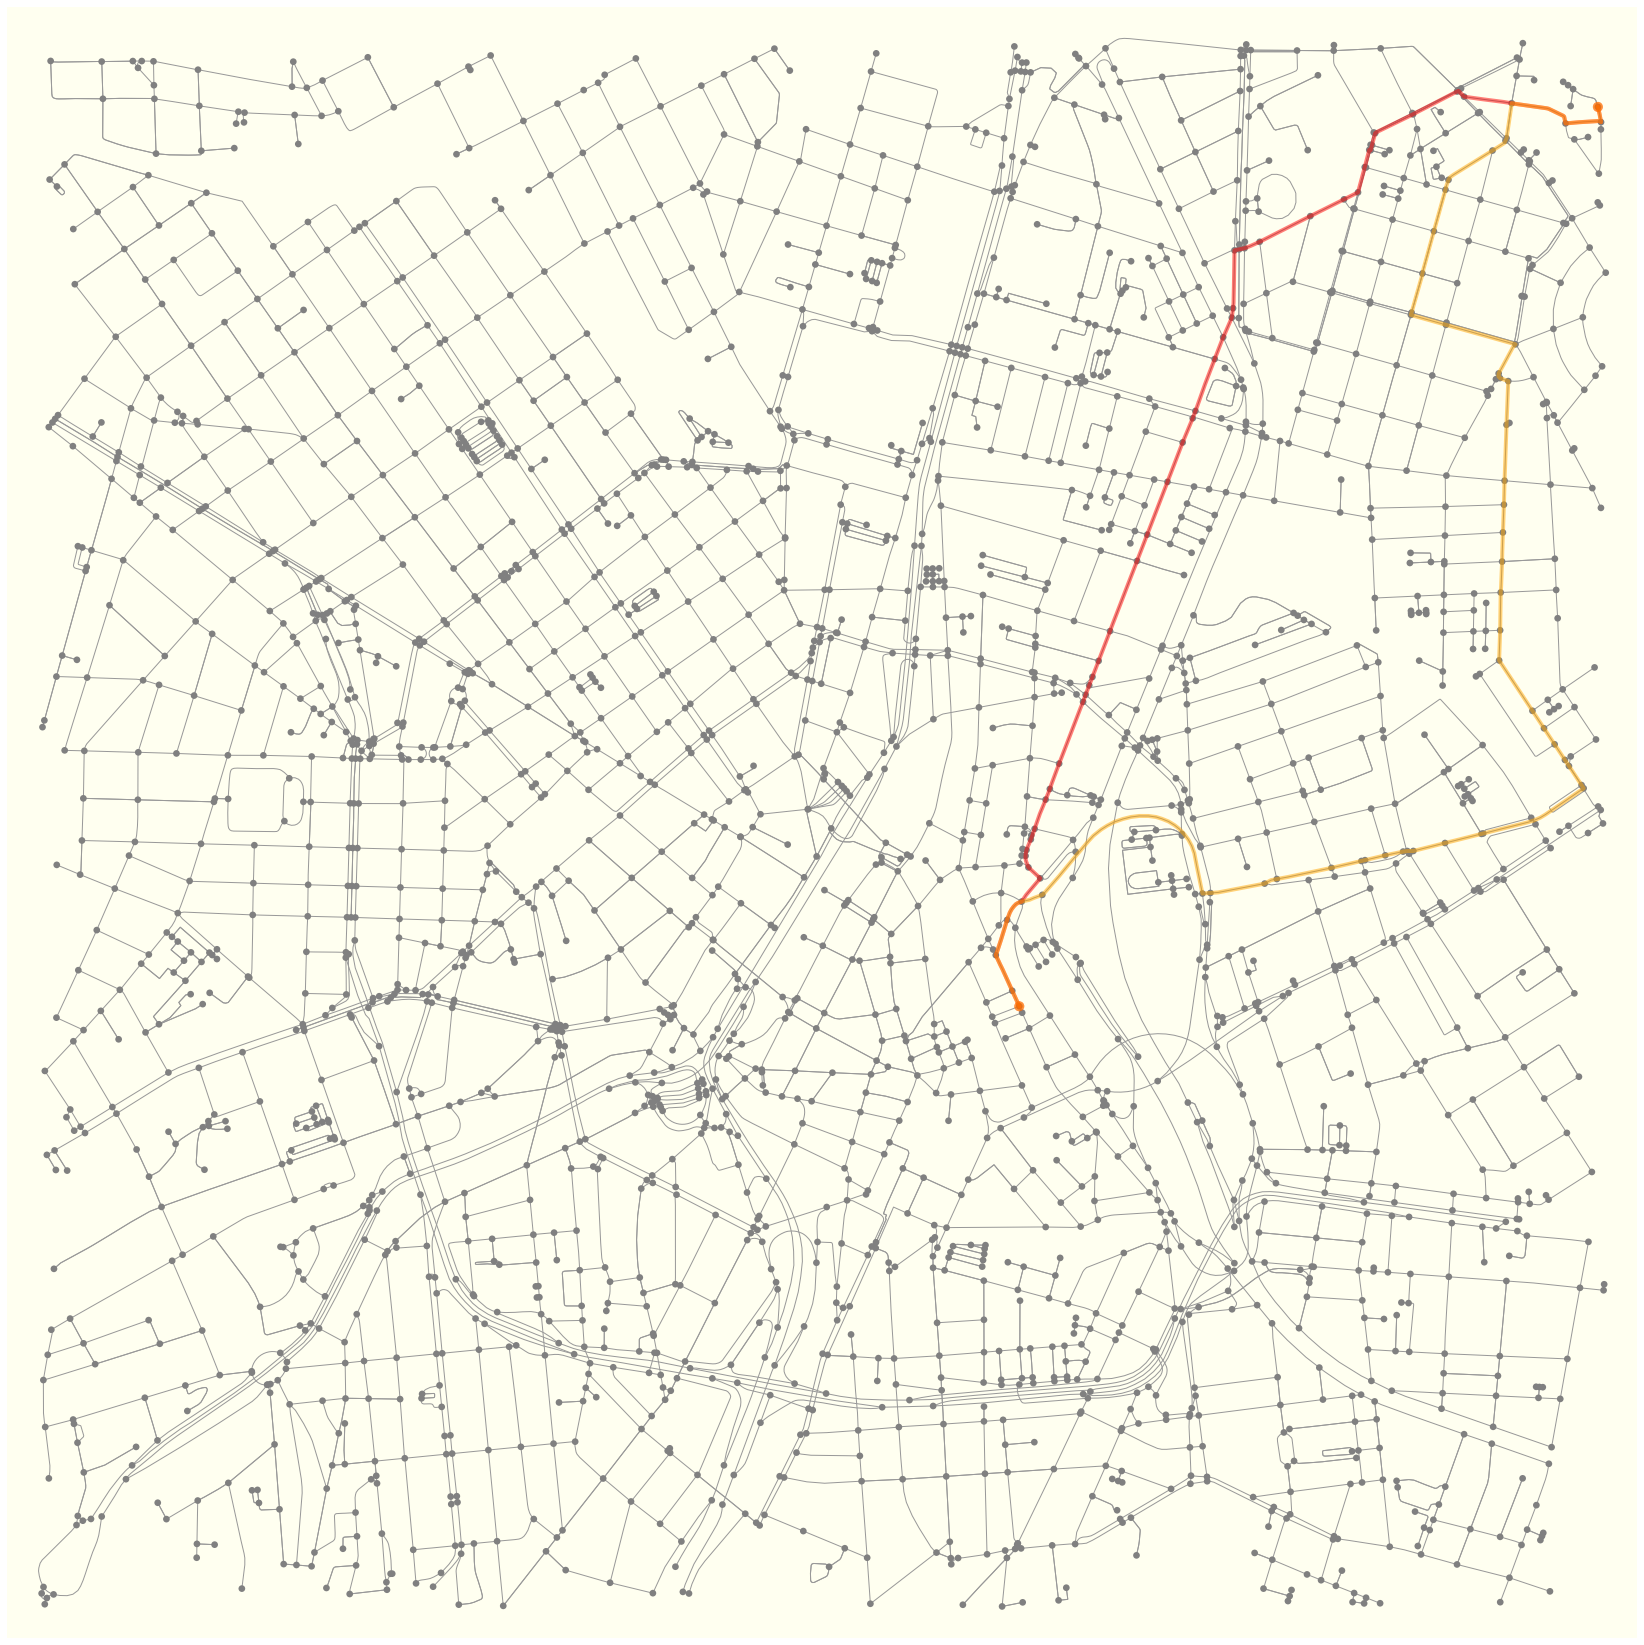

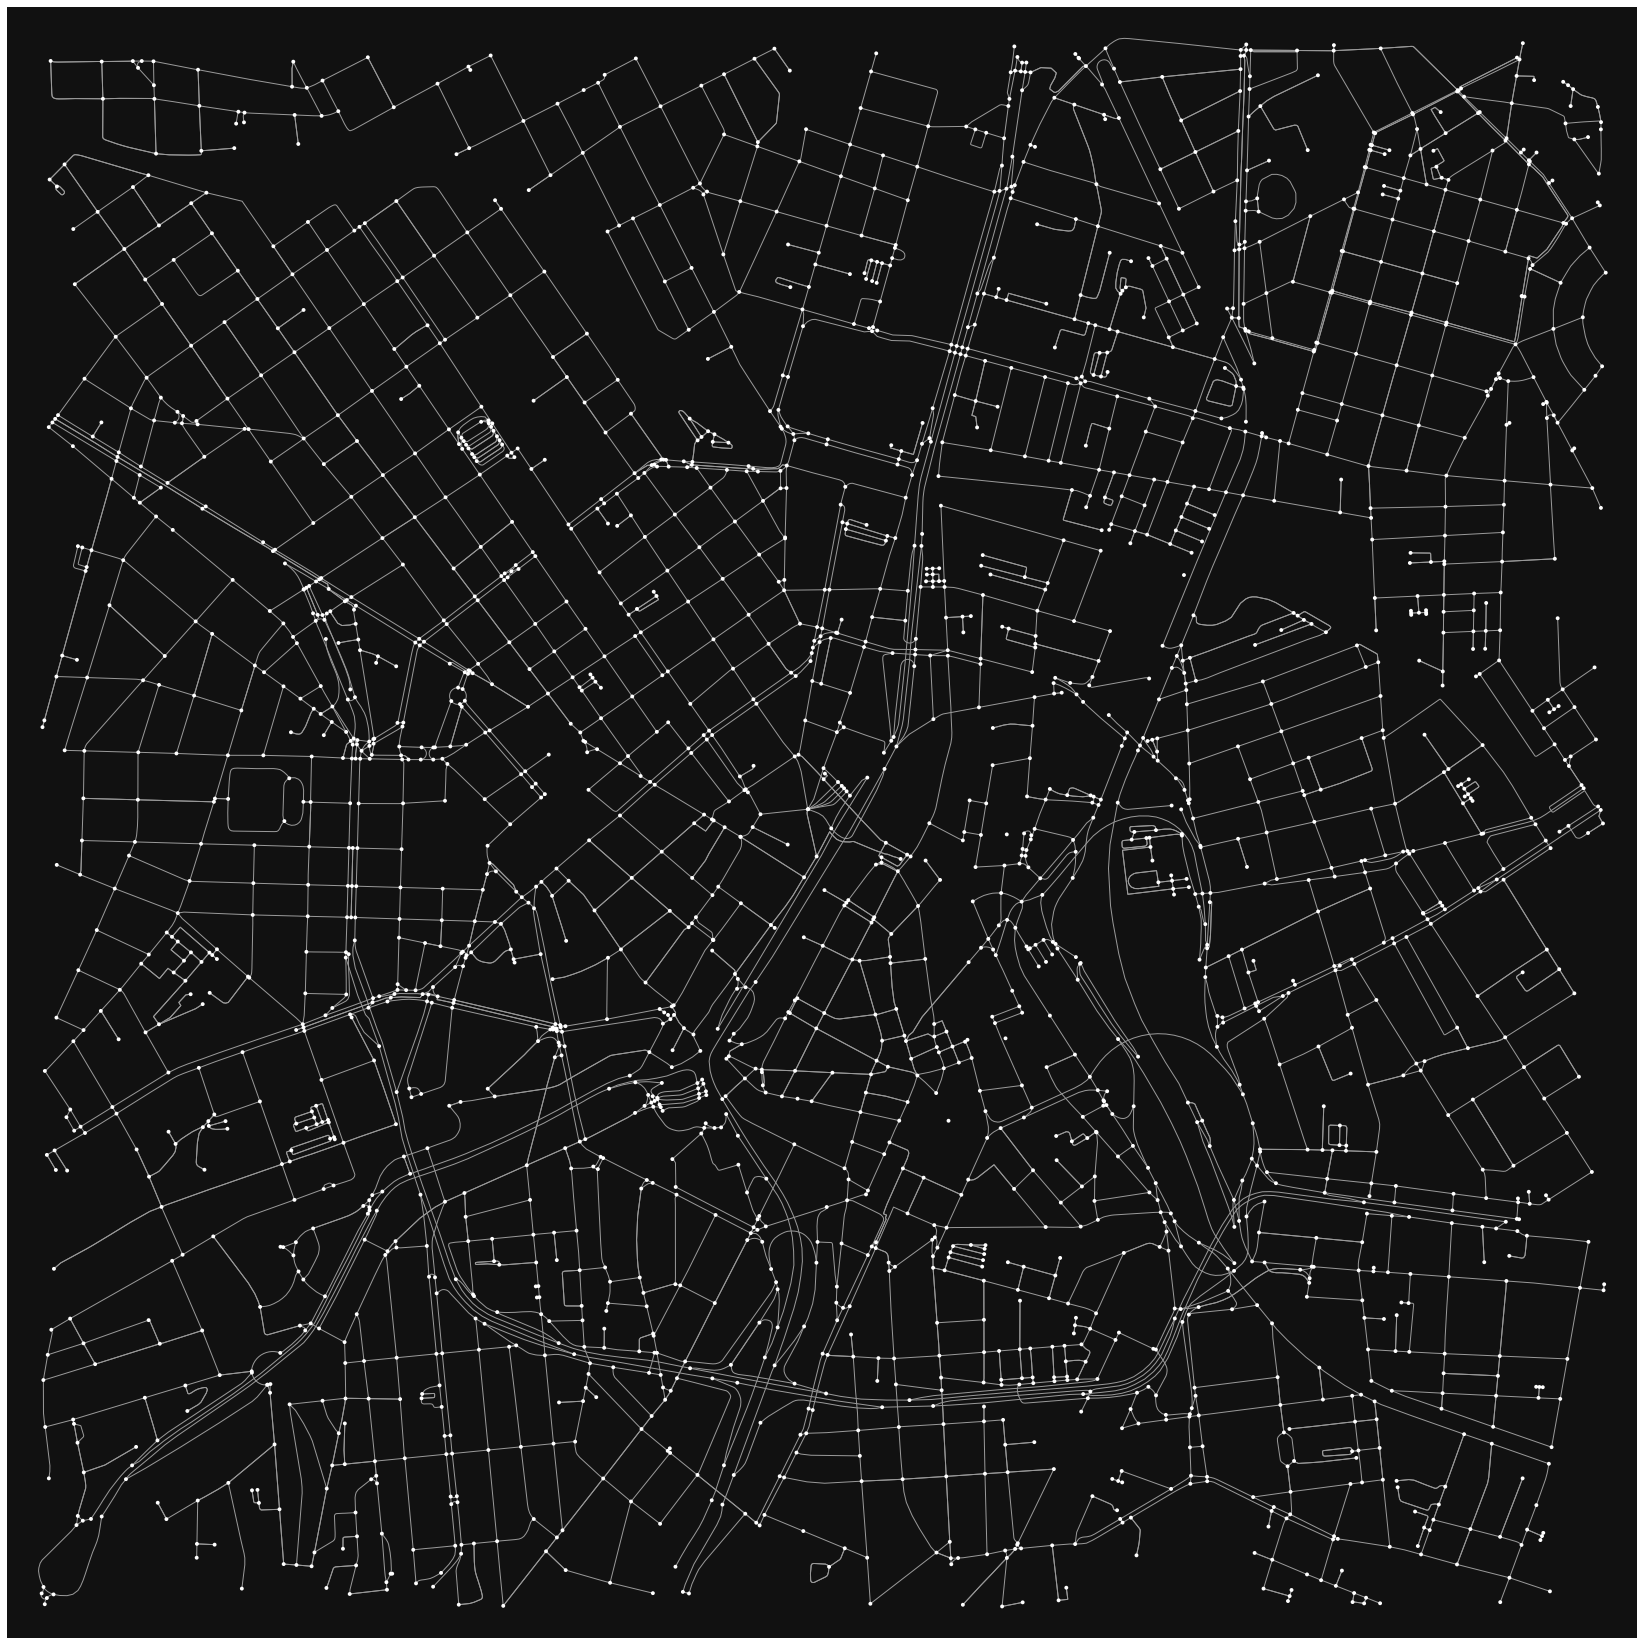

(<Figure size 2880x2160 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f50153d5650>)

In [ ]:
#Plotando 2 mapas. 1 com as rotas sem alagamentos. 2 Com as ruas alagadas removidas.
fig,ax= ox.plot_graph_routes(graph, routes = [route,rota_sem_alagamento], route_colors=['Red','Orange'],figsize=(40,30),node_color='gray', node_size= 45, bgcolor = 'ivory')
ox.plot_graph(G2,figsize=(40, 30))

In [ ]:
####### PARTE 2 Analises ######
###############################

grafo_analises = ox.graph_from_point(coords,dist=1400, network_type='drive') #rodamos com 1400 demorou 1h metade da memória
ox.plot_graph(grafo_analises,figsize=(20, 10))

In [ ]:
#quantidade de nós e arestas
no,ed = ox.graph_to_gdfs(grafo_analises)
print(len(no),len(ed))

1201 2100


In [ ]:
#encontrando os indices / nós
origens = []

for i in (no.iterrows()):

   origens.append(i[0])

n = len(origens)

print(n,'\n',origens) 


1201 
 [597282, 597283, 25871539, 25871670, 25871831, 25871833, 25872025, 25872075, 25872212, 25872232, 25872236, 25872254, 25872264, 25872274, 25872723, 25872726, 25872749, 25872763, 25872766, 25928248, 25928388, 25928438, 25928439, 25928614, 25928755, 25928842, 25928939, 25928961, 25928964, 25929039, 60624525, 60641012, 60641027, 60641028, 60641030, 60641031, 60641034, 60641038, 60641043, 60641048, 60641052, 60641085, 60641086, 60641088, 60641089, 60641100, 60641101, 60641102, 60641117, 60641149, 60641181, 60641211, 60641252, 60641257, 60641282, 60641305, 60641326, 60641336, 60641359, 60641364, 60641382, 60641387, 60641411, 60641414, 60641488, 60641511, 60641571, 60641664, 60641667, 60685349, 60685350, 60685352, 60685357, 60685358, 60685360, 60685363, 60685365, 60685366, 60685367, 60685368, 60685373, 60685374, 60685376, 60685377, 60685384, 60685387, 60685391, 60685397, 60685402, 60685404, 60685409, 60685428, 60685429, 60685431, 60685446, 60685465, 60685472, 60685476, 60685613, 606856

In [ ]:
#calculando menores caminhos e seus comprimentos de um ponto todos os ponto até todos os outros
cp = []
rt = []

comprimento_all = [[]]*n
rotas_all = [[]]*n

for i in (origens):
   cp.append(nx.single_source_dijkstra_path_length(grafo_analises,source = i, weight ='length')) #comprimento
   rt.append(nx.single_source_dijkstra_path(grafo_analises, source=i, weight = 'length'))      #rotas

for i in range(n): #arranjando em listas as rotas 
   aux1 = []
   for j in rt[i].values():
         aux1.append(j)
        
   rotas_all[i] = aux1

for i in range(n): #arranjando em listas os comprimentos
   aux2 = []
   for j in cp[i].values():
         aux2.append(j)

   comprimento_all[i] = aux2


In [ ]:
#data frame menor caminho
menor_caminho = gpd.GeoDataFrame(data = cp,index = origens,columns= origens)


In [ ]:
menor_caminho

In [ ]:
### Matriz de Eficiência original 
eficiencia = menor_caminho.copy()
eficiencia = eficiencia.mask(eficiencia > 0,1/eficiencia) 
  
eficiencia

In [ ]:
#Eficiência Global matriz menor_caminho
soma_ef = eficiencia.sum(axis = 1).sum()
print("Soma da eficiência:",soma_ef)

ef_global = soma_ef*(1/(n*(n-1))) 

print("Eficiência Global:",ef_global)

Soma da eficiência: 793.1598459769386
Eficiência Global: 0.0005503468262398963


In [ ]:
#SPAWN --- Shortest_Paths_without_node
from functools import partial
def SPAWN(No,Grafo,origens_sem_no): 
    grafo_sem_no = Grafo.copy()                            #gerando grafo copia para manipulação
    
    print("\nNó selecionado:",No,'\n')
    grafo_sem_no.remove_node(No)                         #removendo nó selecionado

    #calculando menores caminhos e seus comprimentos de um ponto todos os ponto até todos os outros com pontos removidos
    mapfunc = partial(nx.single_source_dijkstra_path_length,grafo_sem_no,weight ='length')
    cp_sem_no = list(map(mapfunc,origens_sem_no))

    menor_caminho_spawn = gpd.GeoDataFrame(data = cp_sem_no,index = origens_sem_no,columns= origens_sem_no)
    
    return menor_caminho_spawn
    

In [ ]:
#Vulnerabilidade 

def vulnerabilidade(No,numero_vertice, ef_V):

   ef_V = ef_V*(1/(numero_vertice*(numero_vertice-1)))                  
   print(f'A eficiencia (G,{No}) é ---> {ef_V}')

   Vulne =  (ef_global - ef_V)/ef_global
   Vulne = Vulne * 100
   
   print(f'A vulnerabilidade do nó {No} é ---> {Vulne}')       
   print('')
   
   return Vulne

In [ ]:
#Mostrando as eficiências de cada nó removidos e vulnerabilidade
vulnerability = []
spawn_s = []
for nod, j in  zip(origens,range(len(origens))):
  print("Numero:",j)
  ef = 0
  
  eficiencia_sem_no=0

  origem_vulnerabilidade = origens.copy() 
  origem_vulnerabilidade.remove(nod) 
  
  aux3 = SPAWN(nod,grafo_analises,origem_vulnerabilidade)
  
  spawn_s.append(aux3)
  eficiencia_sem_no  = aux3.mask(aux3 > 0,1/aux3) 

  ef = np.ma.masked_invalid(eficiencia_sem_no).sum()

  print(f'Soma Total das eficiencias:',ef)
  
  vulnerability.append(vulnerabilidade(nod,len(origens),ef))
  print("####################################################################\n")
aux5 = ["%.6f" % member for member in vulnerability]
vulnerability = [float(vulnerability) for vulnerability in aux5]




A saída de streaming foi truncada nas últimas 5000 linhas.
Soma Total das eficiencias: 791.2830223124322
A eficiencia (G,455606269) é ---> 0.0005490445616933335
A vulnerabilidade do nó 455606269 é ---> 0.2366261572652689

####################################################################

Numero: 453

Nó selecionado: 455606272 

Soma Total das eficiencias: 789.0642882615183
A eficiencia (G,455606272) é ---> 0.000547505057078489
A vulnerabilidade do nó 455606272 é ---> 0.5163596891841881

####################################################################

Numero: 454

Nó selecionado: 455606284 

Soma Total das eficiencias: 789.6928600733964
A eficiencia (G,455606284) é ---> 0.0005479412018272249
A vulnerabilidade do nó 455606284 é ---> 0.43711061788204675

####################################################################

Numero: 455

Nó selecionado: 455606385 

Soma Total das eficiencias: 790.798060365254
A eficiencia (G,455606385) é ---> 0.0005487080629789439
A vulnerabilidade 

In [ ]:
#Inserindo a coluna de vulnerabilidade
no.insert(loc = 3, column= 'Vulnerabilidade', value = vulnerability)

In [ ]:
#gerando um grafo com as alterações no geodataframe dos nós
grafo_analises = ox.graph_from_gdfs(no,ed)

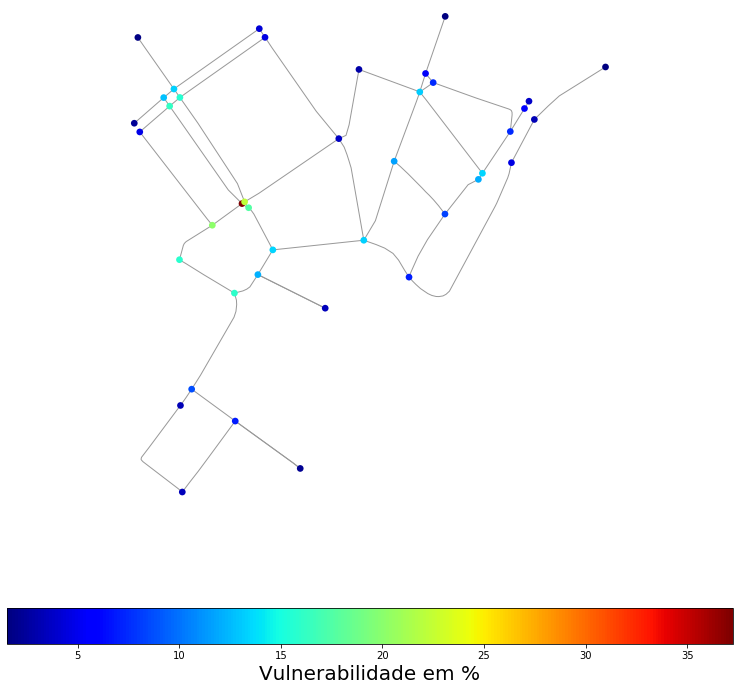

In [ ]:
import matplotlib as mpl

G = ox.project_graph(grafo_analises)
cmap = plt.cm.get_cmap('jet')
norm = plt.Normalize(vmin=min(vulnerability), vmax=max(vulnerability))
sm = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])

nc = ox.plot.get_node_colors_by_attr(grafo_analises, cmap='jet',attr='Vulnerabilidade')

fig, ax = ox.plot_graph(grafo_analises, node_color=nc, node_size= 45, figsize=(13,13), bgcolor = 'white',show=False)

plt.colorbar(sm,orientation='horizontal').set_label('Vulnerabilidade em %',fontsize =20)


In [ ]:
#### Matriz SPAWN

Spawn = [] 

for i , j in zip(origens,range(len(origens))):
  #gerando matriz N-1 comparativa
  print('Número:',j)

  matriz_N_1 = 0
  matriz_spawn = 0
  matriz_N_1 = menor_caminho.copy() # Matriz cópia n-1 

  matriz_N_1 = matriz_N_1.drop([i],axis = 0) #removendo a coluna do nó escolhido
  matriz_N_1= matriz_N_1.drop([i],axis = 1)  #removendo a linha do nó escolhido



  matriz_N_1 = matriz_N_1.replace(np.nan, -1 )  #removendo todos os nan, necessário para cálcular spawn
 
#=============================================================================== 

 #Gerando matriz spawn
  origem_spawn = origens.copy()  # gerando lista nova
  origem_spawn.remove(i)   #Removendo nó da lista 

  
  matriz_spawn = spawn_s[j]
  
  matriz_spawn = matriz_spawn.mask(matriz_N_1 < 0,1) 

  matriz_spawn = matriz_spawn.replace(np.nan, -1) 
  
  matriz_spawn = matriz_spawn.mask(matriz_spawn  < 0, matriz_N_1) 

#===============================================================================
#Somando tudo

  soma_spawn_N_1 = matriz_N_1.where(matriz_N_1 != -1).sum(axis=1).sum()

  soma_spawn_MTX = matriz_spawn.where(matriz_spawn != 1).sum(axis=1).sum()

  diferenca = soma_spawn_MTX - soma_spawn_N_1

  Spawn.append(100*(diferenca/soma_spawn_N_1))

  print(f'Resultado Matriz Spawn: {soma_spawn_MTX/1000:.9} Kilometros')
  print(f'Resultado Matriz N - 1: {soma_spawn_N_1/1000:.9} Kilometros\n')
  print(f'\nImpacto em metros da remoção do nó({i}): {100*(diferenca/soma_spawn_N_1)} em %\n')

aux6 = ["%.3f" % member for member in Spawn]
Spawn = [float(Spawn) for Spawn in aux6]

In [ ]:
#Inserindo a coluna de SPAWN
no.insert(loc = 4, column= 'SPAWN (Km)', value = Spawn)

In [ ]:
#gerando um grafo com as alterações no geodataframe dos nós
grafo_analises = ox.graph_from_gdfs(no,ed)

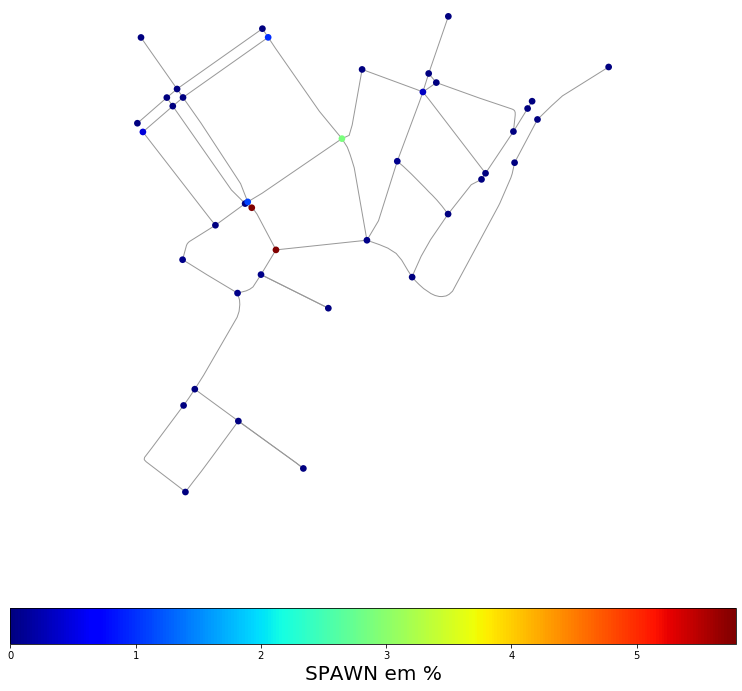

In [ ]:
#plotando spawn
G = ox.project_graph(grafo_analises)
cmap = plt.cm.get_cmap('jet')
norm = plt.Normalize(vmin=min(Spawn), vmax=max(Spawn))
sm = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])

nc = ox.plot.get_node_colors_by_attr(grafo_analises, cmap='jet',attr='SPAWN (Km)')

fig, ax = ox.plot_graph(grafo_analises, node_color=nc, node_size= 45, figsize=(13,13), bgcolor = 'white',show=False)

plt.colorbar(sm,orientation='horizontal').set_label('SPAWN em %',fontsize =20)

In [ ]:
#Organizando os pontos de alagamentos
alag = []

for i in origens:
   if i in all_nodes:
     alag.append(1)
   
   else:
     alag.append(0)

In [ ]:
#Inserindo a coluna de SAlag
no.insert(loc = 5, column= 'Alag (0/1)', value = alag)

In [ ]:
#gerando um grafo com as alterações no geodataframe dos nós
grafo_analises = ox.graph_from_gdfs(no,ed)

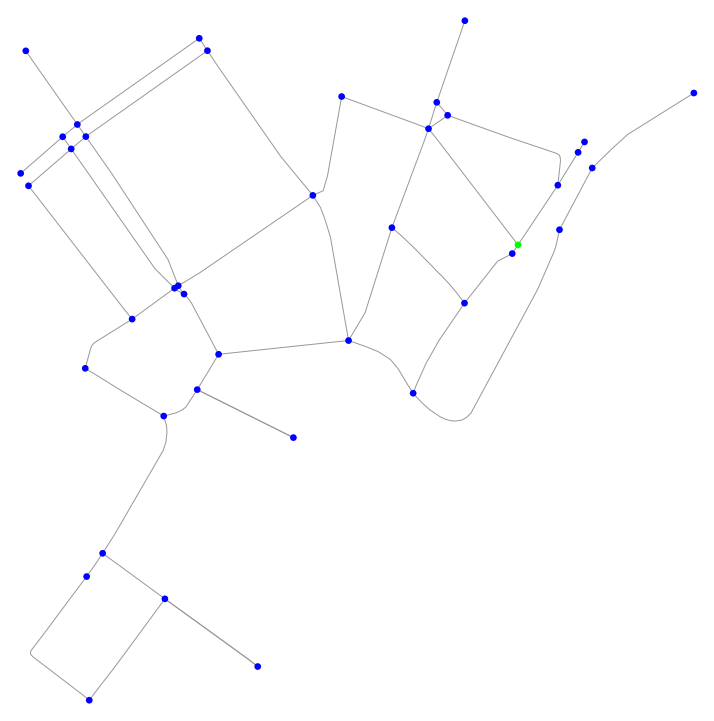

In [ ]:
#plotando Alagamentos
G = ox.project_graph(grafo_analises)

nc = ox.plot.get_node_colors_by_attr(grafo_analises, cmap='brg',attr='Alag (0/1)')

fig, ax = ox.plot_graph(grafo_analises, node_color=nc, node_size= 45, figsize=(13,13), bgcolor = 'white',show=False)

In [ ]:
no.rename(columns={'y':'LAT','x':'LONG'})

In [ ]:
#criando CSV com dados
no = no.rename_axis('Nós')
no = no.rename(columns={'y':'LAT','x':'LONG'})
no.to_csv(r'/content/drive/MyDrive/IC_Arthur_UNIFESP/Dados/Dados_Vulne_SPAWN_Alag_1.4km.csv',encoding='utf-8',index = True,columns=['LAT','LONG','Vulnerabilidade','SPAWN (Km)','Alag (0/1)'])